In [62]:
import pandas as pd
from math import ceil
import numpy as np
import pydot as pt
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [63]:
# Beer rating data
data = pd.read_csv("train.csv", sep = ',')
columns = data.columns

In [64]:
data

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.00,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.00,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.70,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.40,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.40,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000
5,14095,10.00,21436,14,YouEnjoyMyStout,Russian Imperial Stout,4.0,4.0,4.0,4.0,4.5,served in a snifter; on-tap at CBC.\t\tcolor i...,"{'min': 16, 'hour': 1, 'mday': 20, 'sec': 9, '...",1324343769,NaN,NaN,NaN,NaN,perrymarcus
6,13759,12.60,10001,14,Benevolence,American Wild Ale,4.0,4.5,4.0,4.0,4.0,my 100th review on-tap! mini snifter\t\t A nut...,"{'min': 1, 'hour': 18, 'mday': 8, 'sec': 12, '...",1244484072,NaN,NaN,NaN,NaN,GratefulBeerGuy
7,3914,8.40,52211,14879,Frog's Hollow Double Pumpkin Ale,Pumpkin Ale,4.0,4.0,4.0,4.0,4.0,One of the better pumpkin ales I've tried so f...,"{'min': 32, 'hour': 20, 'mday': 9, 'sec': 40, ...",1286656360,NaN,NaN,NaN,NaN,Daniellobo
8,47953,9.00,34361,394,Stoudt's Barrel Aged Old Abominable,English Barleywine,4.5,4.0,4.5,4.5,4.5,A snifter filled (several times over) from a 7...,"{'min': 26, 'hour': 3, 'mday': 16, 'sec': 13, ...",1279250773,NaN,NaN,NaN,Male,msubulldog25
9,7047,6.20,32676,1386,One Hop Wonder IPA,American IPA,2.0,2.0,2.0,2.5,2.0,"Brewed with five hop additions, this alleged I...","{'min': 26, 'hour': 5, 'mday': 16, 'sec': 41, ...",1160976401,NaN,NaN,NaN,NaN,RedDiamond


In [65]:
# Define usefull data
col_indx = np.append(0, np.linspace(11, 17, 7, dtype = 'int'))
col_indx = np.append(col_indx, 2)
col_indx = np.append(col_indx, 3)

df = data.drop(columns[col_indx], axis = 1)

In [71]:
df

,beer/ABV,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,user/profileName
0,5.00,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,RblWthACoz
1,11.00,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,BeerSox
2,4.70,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,mschofield
3,4.40,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,molegar76
4,4.40,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,Brewbro000
5,10.00,YouEnjoyMyStout,Russian Imperial Stout,4.0,4.0,4.0,4.0,4.5,perrymarcus
6,12.60,Benevolence,American Wild Ale,4.0,4.5,4.0,4.0,4.0,GratefulBeerGuy
7,8.40,Frog's Hollow Double Pumpkin Ale,Pumpkin Ale,4.0,4.0,4.0,4.0,4.0,Daniellobo
8,9.00,Stoudt's Barrel Aged Old Abominable,English Barleywine,4.5,4.0,4.5,4.5,4.5,msubulldog25
9,6.20,One Hop Wonder IPA,American IPA,2.0,2.0,2.0,2.5,2.0,RedDiamond


In [67]:
# Define a minimum amounts of rated beers per user (20 for start)
valid_user = df['user/profileName'].value_counts()[df['user/profileName'].value_counts()>20].index.values.tolist()
#valid_user

In [68]:
# Keep the original df intact
dfuser = df.copy()
dfuser.set_index('user/profileName', inplace = True)

In [69]:
# Select valid users
df_user = dfuser.loc[valid_user]

In [70]:
df_user

,beer/ABV,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste
user/profileName,,,,,,,,
northyorksammy,6.50,Founders Harvest Ale,American IPA,3.5,4.0,4.0,4.0,4.0
northyorksammy,11.00,Bearded Pat's Barleywine,American Barleywine,3.5,3.5,3.0,3.5,3.0
northyorksammy,4.00,Trafalgar Dark Wheat,American Dark Wheat Ale,4.0,3.5,3.0,2.5,3.0
northyorksammy,9.00,Founders Barrel Aged Red's Rye,Rye Beer,4.0,4.0,3.5,4.0,3.5
northyorksammy,7.00,Pike Street XXXXX Stout,American Stout,4.0,4.0,4.0,4.0,4.0
northyorksammy,5.20,Taps Rauchbier,Smoked Beer,3.5,4.0,3.0,3.0,3.5
northyorksammy,10.20,Founders Backwoods Bastard,Scotch Ale / Wee Heavy,4.0,4.0,4.0,3.5,4.0
northyorksammy,4.60,Weizen,Hefeweizen,3.5,4.0,4.0,3.5,3.5
northyorksammy,10.50,Gulden Fraug Belgian Style Ale,Belgian Strong Pale Ale,3.5,3.5,4.0,4.0,3.5


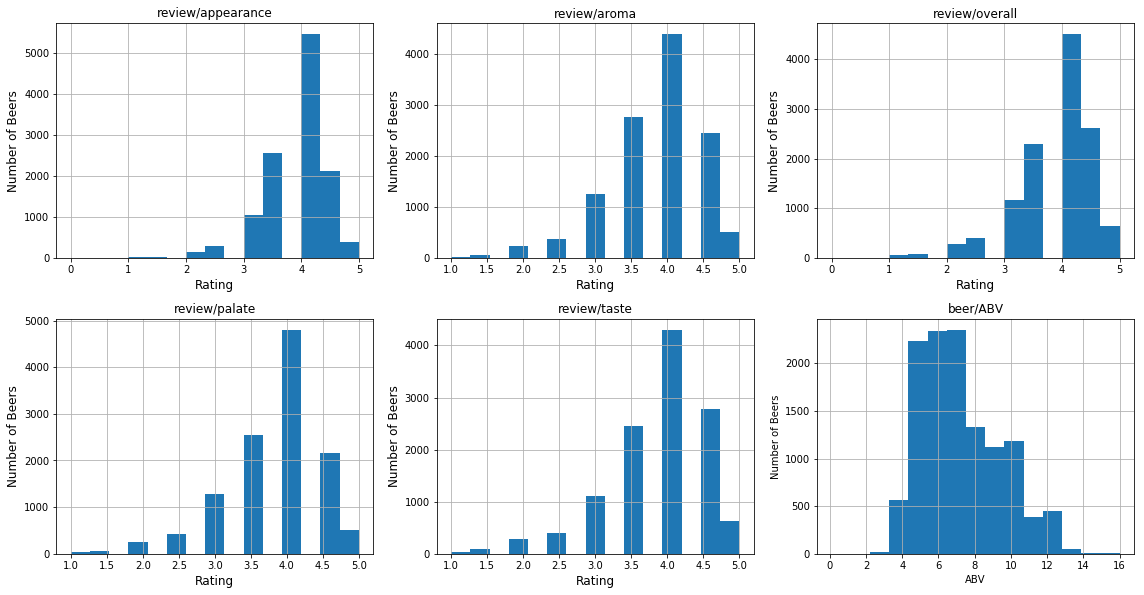

In [76]:
fig = plt.figure(figsize = (16, 12))
k = 1
for i in df_user.columns.values[np.linspace(3, 7, 5, dtype = 'int')].tolist():
    ax = fig.add_subplot(3, 3, k)
    
    plt.xlabel('Rating', fontsize = 12)
    plt.ylabel('Number of Beers', fontsize = 12)
    plt.title(i)
    
    temp_plot = df_user[i].hist(bins = 15);
    ax = plt.gca()
    k += 1
    plt.tight_layout()

ax = fig.add_subplot(3, 3, 6)
plt.xlabel('ABV')
plt.ylabel('Number of Beers')
plt.title('beer/ABV')

full_train = df_user['beer/ABV'].hist(bins = 15);
ax = plt.gca()
plt.tight_layout()

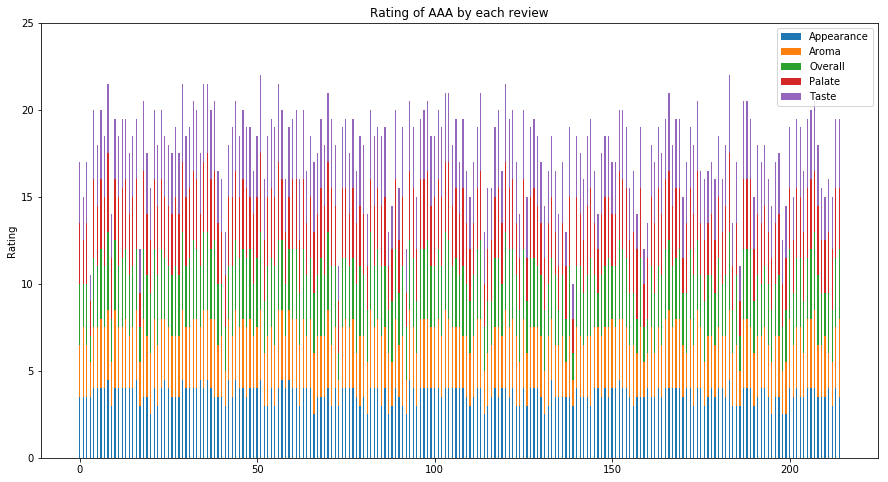

In [80]:
df_amber = df_user[df_user['beer/style'] == 'American Amber / Red Ale']

ind = range(len(df_amber))
width = 0.35  

plt.figure(figsize = (15,8))

p1 = plt.bar(ind, df_amber['review/appearance'], width)
p2 = plt.bar(ind, df_amber['review/aroma'], width, bottom = df_amber['review/appearance'])
p3 = plt.bar(ind, df_amber['review/overall'], width, bottom = df_amber['review/aroma'] + df_amber['review/appearance'])
p4 = plt.bar(ind, df_amber['review/palate'], width, bottom = df_amber['review/overall'] + df_amber['review/aroma'] + df_amber['review/appearance'])
p5 = plt.bar(ind, df_amber['review/taste'], width, bottom = df_amber['review/palate'] + df_amber['review/overall'] + df_amber['review/aroma'] + df_amber['review/appearance'])

plt.ylabel('Rating')
plt.title('Rating of AAA by each review')
plt.yticks(np.arange(0, 26, 5))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('Appearance', 'Aroma', 'Overall', 'Palate', 'Taste'))

plt.show();

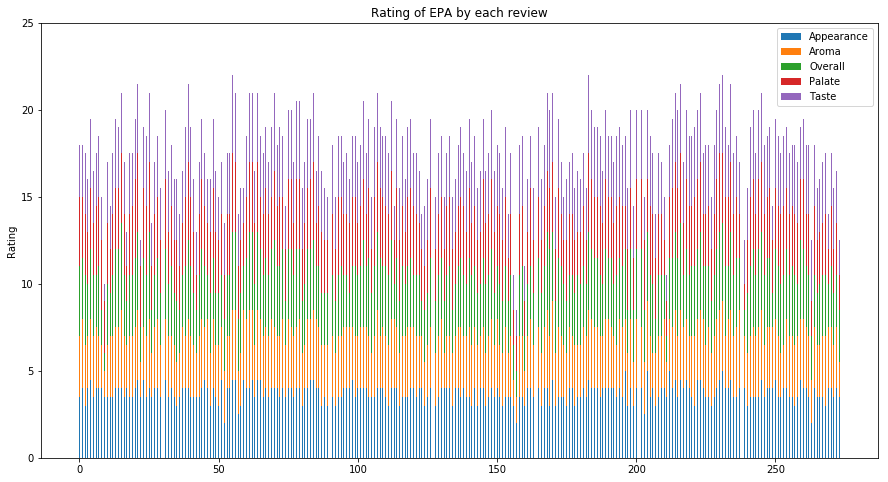

In [82]:
df_epa = df_user[df_user['beer/style'] == 'English Pale Ale']

ind = range(len(df_epa))
width = 0.35  

plt.figure(figsize = (15,8))

p1 = plt.bar(ind, df_epa['review/appearance'], width)
p2 = plt.bar(ind, df_epa['review/aroma'], width, bottom = df_epa['review/appearance'])
p3 = plt.bar(ind, df_epa['review/overall'], width, bottom = df_epa['review/aroma'] + df_epa['review/appearance'])
p4 = plt.bar(ind, df_epa['review/palate'], width, bottom = df_epa['review/overall'] + df_epa['review/aroma'] + df_epa['review/appearance'])
p5 = plt.bar(ind, df_epa['review/taste'], width, bottom = df_epa['review/palate'] + df_epa['review/overall'] + df_epa['review/aroma'] + df_epa['review/appearance'])

plt.ylabel('Rating')
plt.title('Rating of EPA by each review')
plt.yticks(np.arange(0, 26, 5))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('Appearance', 'Aroma', 'Overall', 'Palate', 'Taste'))

plt.show();

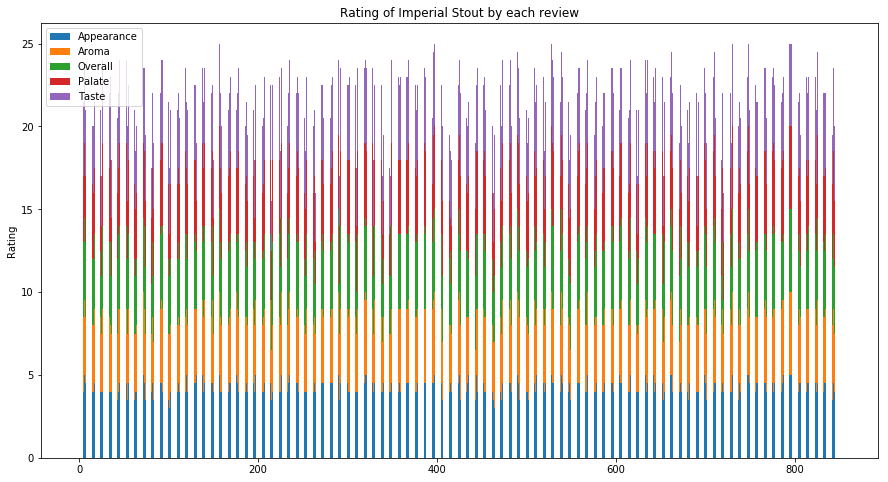

In [83]:
df_is = df_user[df_user['beer/style'] == 'American Double / Imperial Stout']

ind = range(len(df_is))
width = 0.35  

plt.figure(figsize = (15,8))

p1 = plt.bar(ind, df_is['review/appearance'], width)
p2 = plt.bar(ind, df_is['review/aroma'], width, bottom = df_is['review/appearance'])
p3 = plt.bar(ind, df_is['review/overall'], width, bottom = df_is['review/aroma'] + df_is['review/appearance'])
p4 = plt.bar(ind, df_is['review/palate'], width, bottom = df_is['review/overall'] + df_is['review/aroma'] + df_is['review/appearance'])
p5 = plt.bar(ind, df_is['review/taste'], width, bottom = df_is['review/palate'] + df_is['review/overall'] + df_is['review/aroma'] + df_is['review/appearance'])

plt.ylabel('Rating')
plt.title('Rating of Imperial Stout by each review')
plt.yticks(np.arange(0, 26, 5))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('Appearance', 'Aroma', 'Overall', 'Palate', 'Taste'))

plt.show();